<a id='Q0'></a>
<center> <h1> Aviation Herald Project: TF-IDF</h1> </center>
<p style="margin-bottom:1cm;"></p>
<center><h4>Laurent Bobay, 2024</h4></center>
<p style="margin-bottom:1cm;"></p>

<div style="background:#EEEDF5;border-top:0.1cm solid #EF475B;border-bottom:0.1cm solid #EF475B;">
    <div style="margin-left: 0.5cm;margin-top: 0.5cm;margin-bottom: 0.5cm;color:#303030">
        <p><strong>Goal:</strong> Create dataset of all publicly available articles and comments from www.avherald.com</p>
        <strong> Outline:</strong>
        <a id='P0' name="P0"></a>
        <ol>
            <li> <a style="color:#303030" href='#SU'>Set up</a></li>
            <li> <a style="color:#303030" href='#P1'>Data Exploration and Cleaning</a></li>
            <li> <a style="color:#303030" href='#P2'>Modeling</a></li>
            <li> <a style="color:#303030" href='#P3'>Model Evaluation</a></li>
            <li> <a style="color:#303030" href='#CL'>Conclusion</a></li>
        </ol>
        <strong>Topics Trained:</strong> Notebook Layout, Data Cleaning, Modelling and Model Evaluation
    </div>
</div>

<nav style="text-align:right"><strong>
        <a style="color:#00BAE5" href="https://monolith.propulsion-home.ch/backend/api/momentum/materials/ds-materials/07_MLEngineering/index.html" title="momentum"> Module 7, Machine Learning Engineering </a>|
        <a style="color:#00BAE5" href="https://monolith.propulsion-home.ch/backend/api/momentum/materials/ds-materials/07_MLEngineering/day1/index.html" title="momentum">Day 1, Data Science Project Development </a>|
        <a style="color:#00BAE5" href="https://drive.google.com/file/d/1SOCQu9Gv3jNNXxvJSszBC3fYNsM0df2F/view?usp=sharing" title="momentum"> Live Coding 1, Simple Prediction Notebook</a>
</strong></nav>

<a id='I' name="I"></a>
## [Introduction](#P0)

www.avherald.com is the standard when it comes to listing aviation incidents and occurrences and lists around 30000 occurrences. The goal of this notebook is scraping the site and store the articles as a dataset. 

<a id='SU' name="SU"></a>
## [Set up](#P0)

### Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from tqdm import tqdm

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


### File Paths

In [2]:
path = "../data/interim/preprocessed_dataset.csv" # title,href,text,time_author


<a id='P1'></a>
## [Data Preparation](#P0)

In [4]:
df = pd.read_csv(path)
df

,title,href,text,time_author,headline,comment_authors,comments,occurrence,url,author,created,updated,normalized_text,cities,countries
0,"Avianca A20N at Bogota on Jul 17th 2024, therm...",/h?article=51b4bc28&opt=0,"An Avianca Airbus A320-200N, registration HK-5...","By Simon Hradecky, created Thursday, Jul 18th ...",Incident: Avianca A20N at Bogota on Jul 17th 2...,[],[],incident,https://avherald.com/h?article=51b4bc28&opt=0,Simon Hradecky,2024-07-18 19:33:00,2024-07-18 19:33:00,avianca airbus registration performing flight ...,"{'bogota', 'colombia', 'mobile', 'guarulhos'}","{'colombia', 'brazil'}"
1,"Endeavor CRJ7 at Atlanta on Jul 17th 2024, sme...",/h?article=51b4b9ec&opt=0,An Endeavor Canadair CRJ-700 on behalf of Delt...,"By Simon Hradecky, created Thursday, Jul 18th ...",Incident: Endeavor CRJ7 at Atlanta on Jul 17th...,[],[],incident,https://avherald.com/h?article=51b4b9ec&opt=0,Simon Hradecky,2024-07-18 19:15:00,2024-07-18 19:15:00,endeavor canadair crj behalf airlines registra...,"{'delta', 'atlanta', 'montgomery'}",set()
2,"Delta A333 at Amsterdam on Jan 12th 2023, touc...",/h?article=503a8162&opt=0,"A Delta Airlines Airbus A330-300, registration...","By Simon Hradecky, created Thursday, Jan 12th ...",Incident: Delta A333 at Amsterdam on Jan 12th ...,"['By Msybdin on Monday, Jan 23rd 2023 02:37Z',...",['Lack of training or fatigue is the factor he...,incident,https://avherald.com/h?article=503a8162&opt=0,Simon Hradecky,2023-01-12 19:04:00,2024-07-18 19:00:00,airlines airbus registration performing flight...,"{'detroit', 'delta', 'amsterdam', 'boston'}","{'denmark', 'netherlands'}"
3,"Delta B763 at Edinburgh on Feb 10th 2023, engi...",/h?article=504f9f37&opt=0,"A Delta Airlines Boeing 767-300, registration ...","By Simon Hradecky, created Friday, Feb 10th 20...",Incident: Delta B763 at Edinburgh on Feb 10th ...,"['By (anonymous) on Thursday, Jul 18th 2024 15...","['The aircraft may have over 130,000 flight ho...",incident,https://avherald.com/h?article=504f9f37&opt=0,Simon Hradecky,2023-02-10 17:26:00,2024-07-18 09:47:00,airlines boeing registration performing flight...,"{'delta', 'edinburgh', 'atlanta', 'york', 'alo...",set()
4,"Nile A321 at Dammam on Jul 18th 2024, rejected...",/h?article=51b4724b&opt=0,"A Nile Air Airbus A321-200, registration SU-BQ...","By Simon Hradecky, created Thursday, Jul 18th ...",Incident: Nile A321 at Dammam on Jul 18th 2024...,"['By Jack Truss on Thursday, Jul 18th 2024 17:...",['Normally you get brakes fire following a rej...,incident,https://avherald.com/h?article=51b4724b&opt=0,Simon Hradecky,2024-07-18 09:09:00,2024-07-18 09:09:00,nile air airbus registration bql performing fl...,"{'cairo', 'dammam'}",{'egypt'}
5,"Canada B789 over Atlantic on Jul 8th 2024, bur...",/h?article=51b4143a&opt=0,"An Air Canada Boeing 787-9, registration C-FSB...","By Simon Hradecky, created Wednesday, Jul 17th...",Incident: Canada B789 over Atlantic on Jul 8th...,[],[],incident,https://avherald.com/h?article=51b4143a&opt=0,Simon Hradecky,2024-07-17 19:42:00,2024-07-17 19:42:00,air boeing registration fsbv performing flight...,"{'montreal', 'toronto', 'london'}",{'canada'}
6,"Jet2 B733 at Leeds on Jul 14th 2024, engine sh...",/h?article=51b40da3&opt=0,"A Jet2.com Boeing 737-300, registration G-GDFO...","By Simon Hradecky, created Wednesday, Jul 17th...","Incident: Jet2 B733 at Leeds on Jul 14th 2024,...","['By SuperFriendlyAviator on Thursday, Jul 18t...","[""Well Joe, you'll be pleased to know then tha...",incident,https://avherald.com/h?article=51b40da3&opt=0,Simon Hradecky,2024-07-17 18:43:00,2024-07-17 18:43:00,jet com boeing registration gdfo performing fl...,"{'leeds', 'split', 'manchester'}",{'croatia'}
7,"Delta B764 at Milan on Jul 16th 2024, engine f...",/h?article=51b3d11e&opt=0,"A Delta Airlines Boeing 767-400, registration ...","By Simon Hradecky, created Wednesday, Jul 17th...",Incident: Delta B764 at Milan on Jul 16th 2024...,"['By Acewos on Thursday, Jul 18th 2024 16:27Z'...",['Only some clar

In [61]:


# Convert all items in 'text' column to string
df['normalized_text'] = df['normalized_text'].apply(lambda x: str(x) if pd.notna(x) else '')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            8 non-null      object
 1   href             8 non-null      object
 2   text             8 non-null      object
 3   time_author      8 non-null      object
 4   headline         8 non-null      object
 5   comment_authors  8 non-null      object
 6   comments         8 non-null      object
 7   occurrence       8 non-null      object
 8   url              8 non-null      object
 9   author           8 non-null      object
 10  created          8 non-null      object
 11  updated          8 non-null      object
 12  normalized_text  8 non-null      object
 13  cities           8 non-null      object
 14  countries        8 non-null      object
dtypes: object(15)
memory usage: 1.1+ KB


### TFIDF vectorization

In [62]:
norm_corpus = df.normalized_text.tolist()
norm_corpus[:3]

['avianca airbus registration performing flight sao paulo passengers crew climbing runway crew stopped climb decided return reporting passenger phone suffered thermal runaway aircraft landed safely back runway hours departure airline reported two passengers become unruly threw phone heated result aircraft burned fuel disruptive passengers handed authorities replacement registration reached sao paulo delay hours occurrence aircraft returned service hours landing back',
 'endeavor canadair crj behalf airlines registration performing flight usa passengers crew climbing runway aircraft stopped climb feet reporting smokey odour cabin aircraft returned safe landing runway minutes departure replacement crj registration reached delay hours occurrence aircraft still ground hours landing back https flightaware com live flight dal history katl kmgm',
 'airlines airbus registration performing flight usa final approach runway main landing gear touched ahead paved surface runway damaged two runway t

In [63]:
tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2', use_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names_out()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,aaib,abnormal,accelerating,acceleration,according,accounting,accounts,actions,actionsflight,actual,...,white,wind,wing,wished,without,workload,would,yellow,yet,zone
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.02,0.02,0.00,0.00,0.00,0.00,...,0.06,0.00,0.00,0.00,0.03,0.00,0.02,0.00,0.00,0.08
3,0.12,0.04,0.00,0.02,0.02,0.00,0.02,0.08,0.02,0.02,...,0.00,0.02,0.14,0.02,0.01,0.02,0.02,0.02,0.02,0.00
4,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00


#### Text similarity with cosine similarity

In [64]:
similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)


In [65]:
# Search similar articles for:
article = 7
markdown_content = df.iloc[article].title
display(Markdown(markdown_content)) 

Delta B764 at Milan on Jul 16th 2024, engine failure on departure

In [66]:
similarity_matrix[article,:]

array([0.03831517, 0.06338189, 0.09258699, 0.04432037, 0.03779619,
       0.02629341, 0.04970774, 1.        ])

In [67]:
similars = np.argsort(-similarity_matrix[article,:])[1:20]
similars

array([2, 1, 6, 3, 0, 4, 5])

In [68]:
for similar in similars:
    markdown_content = df.iloc[similar].title
    display(Markdown(markdown_content)) 

Delta A333 at Amsterdam on Jan 12th 2023, touched down short of runway

Endeavor CRJ7 at Atlanta on Jul 17th 2024, smell of burning

Jet2 B733 at Leeds on Jul 14th 2024, engine shut down in flight

Delta B763 at Edinburgh on Feb 10th 2023, engine shut down in flight

Avianca A20N at Bogota on Jul 17th 2024, thermal runaway of phone battery after being thrown

Nile A321 at Dammam on Jul 18th 2024, rejected takeoff due to brakes fire

Canada B789 over Atlantic on Jul 8th 2024, burning smell on board

In [69]:
new_text = "At 1210:51 hrs, a rudder input to the right occurred. The airplane changed the heading by about 10° to the right to 281° and a short time later was about 230 m beyond the intersection of runway 27 with runway 30, 3.7 m away from the right edge of runway 27. Shortly before the closest distance to the runway edge, the PIC (40, ATPL, 9,870 hours total, 3,052 hours on type) checked the engine parameters, then the co-pilot (28, CPL, 808 hours total, 718 hours on type) said “Sorry, das Flugzeug zieht nach rechts (the airplane is pulling to the right)”, according to the statement of both pilots. Subsequently, the PIC aborted the take-off at a speed of 137 kt CAS, 2 kt below the decision speed V1. According to her own statement, she pulled the thrust lever to idle and then to full reverse. The PIC also executed a left rudder input towards the runway centre line and pulled the side stick back. According to her statement, she can no longer remember to operate the side stick. Immediately afterwards, the nose landing gear lifted off. After the PIC realised the lift-off of the nose, she pushed the side stick forward and the nose landing gear touched down again. During ground contact, the airplane was in a yaw movement towards the left in the direction of the runway centre."

# Transform the new text using the same vectorizer
new_text_vector = tv.transform([new_text]).toarray()

# Compute the cosine similarity between the new text and the corpus
similarity_scores = cosine_similarity(new_text_vector, tv_matrix).flatten()

# Get the indices of the top n similarity scores
n = 30
top_indices = similarity_scores.argsort()[-n:][::-1]
top_indices

array([2, 3, 6, 1, 0, 4, 5, 7])

In [70]:
for idx in top_indices:
    print(df.iloc[idx].title, df.iloc[idx].url)

Delta A333 at Amsterdam on Jan 12th 2023, touched down short of runway https://avherald.com/h?article=503a8162&opt=0
Delta B763 at Edinburgh on Feb 10th 2023, engine shut down in flight https://avherald.com/h?article=504f9f37&opt=0
Jet2 B733 at Leeds on Jul 14th 2024, engine shut down in flight https://avherald.com/h?article=51b40da3&opt=0
Endeavor CRJ7 at Atlanta on Jul 17th 2024, smell of burning https://avherald.com/h?article=51b4b9ec&opt=0
Avianca A20N at Bogota on Jul 17th 2024, thermal runaway of phone battery after being thrown https://avherald.com/h?article=51b4bc28&opt=0
Nile A321 at Dammam on Jul 18th 2024, rejected takeoff due to brakes fire https://avherald.com/h?article=51b4724b&opt=0
Canada B789 over Atlantic on Jul 8th 2024, burning smell on board https://avherald.com/h?article=51b4143a&opt=0
Delta B764 at Milan on Jul 16th 2024, engine failure on departure https://avherald.com/h?article=51b3d11e&opt=0


#### Topic modelling (LDA method)

In [72]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import gensim
from gensim import corpora

# Download NLTK data files (if not already done)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Example corpus
corpus = df.title.tolist()

# Preprocessing function
def preprocess(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text.lower())
    words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    return words

# Preprocess the corpus
processed_corpus = [preprocess(doc) for doc in corpus]

corpus[:5]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/laurent/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/laurent/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/laurent/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['Avianca A20N at Bogota on Jul 17th 2024, thermal runaway of phone battery after being thrown',
 'Endeavor CRJ7 at Atlanta on Jul 17th 2024, smell of burning',
 'Delta A333 at Amsterdam on Jan 12th 2023, touched down short of runway',
 'Delta B763 at Edinburgh on Feb 10th 2023, engine shut down in flight',
 'Nile A321 at Dammam on Jul 18th 2024, rejected takeoff due to brakes fire']

In [73]:
# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(processed_corpus)

# Filter out words that occur less than 2 documents, or more than 50% of the documents
dictionary.filter_extremes(no_below=2, no_above=0.5)

# Create a Bag-of-Words representation of the documents
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_corpus]


In [74]:
# Set parameters for LDA
num_topics = 3
lda_model = gensim.models.LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Title: {df.iloc[idx].title} \nWords: {topic}\n")
    if idx == 20:
        break


Title: Avianca A20N at Bogota on Jul 17th 2024, thermal runaway of phone battery after being thrown 
Words: 0.388*"smell" + 0.388*"burning" + 0.056*"delta" + 0.056*"engine" + 0.056*"shut" + 0.056*"flight"

Title: Endeavor CRJ7 at Atlanta on Jul 17th 2024, smell of burning 
Words: 0.169*"delta" + 0.167*"engine" + 0.166*"flight" + 0.166*"shut" + 0.166*"burning" + 0.166*"smell"

Title: Delta A333 at Amsterdam on Jan 12th 2023, touched down short of runway 
Words: 0.278*"engine" + 0.277*"delta" + 0.194*"shut" + 0.194*"flight" + 0.028*"smell" + 0.028*"burning"



In [75]:
for i, doc_bow in enumerate(bow_corpus):
    doc_topics = lda_model.get_document_topics(doc_bow)
    print(f"Document {i}: {doc_topics}")


Document 0: [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
Document 1: [(0, 0.77617425), (1, 0.112534896), (2, 0.111290865)]
Document 2: [(0, 0.16750605), (1, 0.17008421), (2, 0.6624097)]
Document 3: [(0, 0.06704962), (1, 0.06817038), (2, 0.86477995)]
Document 4: [(0, 0.33333334), (1, 0.33333334), (2, 0.33333334)]
Document 5: [(0, 0.7761746), (1, 0.112534486), (2, 0.111290865)]
Document 6: [(0, 0.08385115), (1, 0.085355155), (2, 0.8307937)]
Document 7: [(0, 0.111634836), (1, 0.113190584), (2, 0.7751746)]


#### Topic extraction from titles

In [76]:
def title_topic(title):
    title_topic = title.split(",")
    if len(title_topic) > 1:
        return title_topic[-1]
    else:
        return title

In [77]:
df["topic"] = df.title.apply(title_topic)
df

,title,href,text,time_author,headline,comment_authors,comments,occurrence,url,author,created,updated,normalized_text,cities,countries,topic
0,"Avianca A20N at Bogota on Jul 17th 2024, therm...",/h?article=51b4bc28&opt=0,"An Avianca Airbus A320-200N, registration HK-5...","By Simon Hradecky, created Thursday, Jul 18th ...",Incident: Avianca A20N at Bogota on Jul 17th 2...,[],[],incident,https://avherald.com/h?article=51b4bc28&opt=0,Simon Hradecky,2024-07-18 19:33:00,2024-07-18 19:33:00,avianca airbus registration performing flight ...,"{'bogota', 'colombia', 'mobile', 'guarulhos'}","{'colombia', 'brazil'}",thermal runaway of phone battery after being ...
1,"Endeavor CRJ7 at Atlanta on Jul 17th 2024, sme...",/h?article=51b4b9ec&opt=0,An Endeavor Canadair CRJ-700 on behalf of Delt...,"By Simon Hradecky, created Thursday, Jul 18th ...",Incident: Endeavor CRJ7 at Atlanta on Jul 17th...,[],[],incident,https://avherald.com/h?article=51b4b9ec&opt=0,Simon Hradecky,2024-07-18 19:15:00,2024-07-18 19:15:00,endeavor canadair crj behalf airlines registra...,"{'delta', 'atlanta', 'montgomery'}",set(),smell of burning
2,"Delta A333 at Amsterdam on Jan 12th 2023, touc...",/h?article=503a8162&opt=0,"A Delta Airlines Airbus A330-300, registration...","By Simon Hradecky, created Thursday, Jan 12th ...",Incident: Delta A333 at Amsterdam on Jan 12th ...,"['By Msybdin on Monday, Jan 23rd 2023 02:37Z',...",['Lack of training or fatigue is the factor he...,incident,https://avherald.com/h?article=503a8162&opt=0,Simon Hradecky,2023-01-12 19:04:00,2024-07-18 19:00:00,airlines airbus registration performing flight...,"{'detroit', 'delta', 'amsterdam', 'boston'}","{'denmark', 'netherlands'}",touched down short of runway
3,"Delta B763 at Edinburgh on Feb 10th 2023, engi...",/h?article=504f9f37&opt=0,"A Delta Airlines Boeing 767-300, registration ...","By Simon Hradecky, created Friday, Feb 10th 20...",Incident: Delta B763 at Edinburgh on Feb 10th ...,"['By (anonymous) on Thursday, Jul 18th 2024 15...","['The aircraft may have over 130,000 flight ho...",incident,https://avherald.com/h?article=504f9f37&opt=0,Simon Hradecky,2023-02-10 17:26:00,2024-07-18 09:47:00,airlines boeing registration performing flight...,"{'delta', 'edinburgh', 'atlanta', 'york', 'alo...",set(),engine shut down in flight
4,"Nile A321 at Dammam on Jul 18th 2024, rejected...",/h?article=51b4724b&opt=0,"A Nile Air Airbus A321-200, registration SU-BQ...","By Simon Hradecky, created Thursday, Jul 18th ...",Incident: Nile A321 at Dammam on Jul 18th 2024...,"['By Jack Truss on Thursday, Jul 18th 2024 17:...",['Normally you get brakes fire following a rej...,incident,https://avherald.com/h?article=51b4724b&opt=0,Simon Hradecky,2024-07-18 09:09:00,2024-07-18 09:09:00,nile air airbus registration bql performing fl...,"{'cairo', 'dammam'}",{'egypt'},rejected takeoff due to brakes fire
5,"Canada B789 over Atlantic on Jul 8th 2024, bur...",/h?article=51b4143a&opt=0,"An Air Canada Boeing 787-9, registration C-FSB...","By Simon Hradecky, created Wednesday, Jul 17th...",Incident: Canada B789 over Atlantic on Jul 8th...,[],[],incident,https://avherald.com/h?article=51b4143a&opt=0,Simon Hradecky,2024-07-17 19:42:00,2024-07-17 19:42:00,air boeing registration fsbv performing flight...,"{'montreal', 'toronto', 'london'}",{'canada'},burning smell on board
6,"Jet2 B733 at Leeds on Jul 14th 2024, engine sh...",/h?article=51b40da3&opt=0,"A Jet2.com Boeing 737-300, registration G-GDFO...","By Simon Hradecky, created Wednesday, Jul 17th...","Incident: Jet2 B733 at Leeds on Jul 14th 2024,...","['By SuperFriendlyAviator on Thursday, Jul 18t...","[""Well Joe, you'll be pleased to know then tha...",incident,https://avherald.com/h?article=51b40da3&opt=0,Simon Hradecky,2024-07-17 18:43:00,2024-07-17 18:43:00,jet com boeing registration gdfo performing fl...,"{'leeds', 'split', 'manchester'}",{'croatia'},engine shut down in flight
7,"Delta B764 at Milan on Jul 16th 2024, engine f...",/h?article=51b3d11e&opt=0,"A Delta

In [78]:
len(df.topic.unique())

7

<div style="border-top:0.1cm solid #EF475B"></div>
    <strong><a href='#Q0'><div style="text-align: right"> <h3>Below the line</h3></div></a></strong>

In [100]:
topic_label = {
    0: "Other",
    1: "Rejected Takeoff",
    2: "Turbulence",
    3: "Fuel and Oil",
    4: "Engine",
    5: "Emergency Descent & Medical",
    6: "Gear",
    7: "Smell",
    8: "Flaps",
    9: "Bird Strike",
    10: "Other",
    11: "Engine Shut Down",
    12: "Windows & Wind Shield",
    13: "Abnormal Runway Contact",
    14: "Hydraulic",
    15: "Runway Incursion & Excursion",
    16: "Pilot Incapacitation",
    17: "Fire & Smoke",
    18: "Tire Failure",
    19: "Loss of Cabin Pressure",
}

df_topic["topic_label"] = df_topic.label.apply(lambda x: topic_label[x])
df_topic

,index,topic,label,topic_label
0,0,runway incursion,15,Runway Incursion & Excursion
1,1,tyre damage on departure,18,Tire Failure
2,2,engine shut down in flight,11,Engine Shut Down
3,3,engine issue,4,Engine
4,4,unsafe gear,6,Gear
...,...,...,...,...
28957,28957,Dec 18th 2003,0,Other
28958,28958,crashed on takeoff,13,Abnormal Runway Contact
28959,28959,crashed short of runway in turbulent final ap...,15,Runway Incursion & Excursion
28960,28960,rolled uncontrolled and crashed into Red Sea,0,Other


In [105]:
# Calculate the count of each label
# Calculate the count of each label
label_counts = df_topic['label'].value_counts()

# Map the counts back to the original DataFrame
df_topic['label_count'] = df_topic['label'].map(label_counts)
df_topic

,index,topic,label,topic_label,label_count
0,0,runway incursion,15,Runway Incursion & Excursion,1473
1,1,tyre damage on departure,18,Tire Failure,796
2,2,engine shut down in flight,11,Engine Shut Down,2083
3,3,engine issue,4,Engine,2124
4,4,unsafe gear,6,Gear,1679
...,...,...,...,...,...
28957,28957,Dec 18th 2003,0,Other,3023
28958,28958,crashed on takeoff,13,Abnormal Runway Contact,1927
28959,28959,crashed short of runway in turbulent final ap...,15,Runway Incursion & Excursion,1473
28960,28960,rolled uncontrolled and crashed into Red Sea,0,Other,3023


/var/folders/ld/c81z579x7n940m4_d4tq448m0000gp/T/ipykernel_41598/1172847880.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




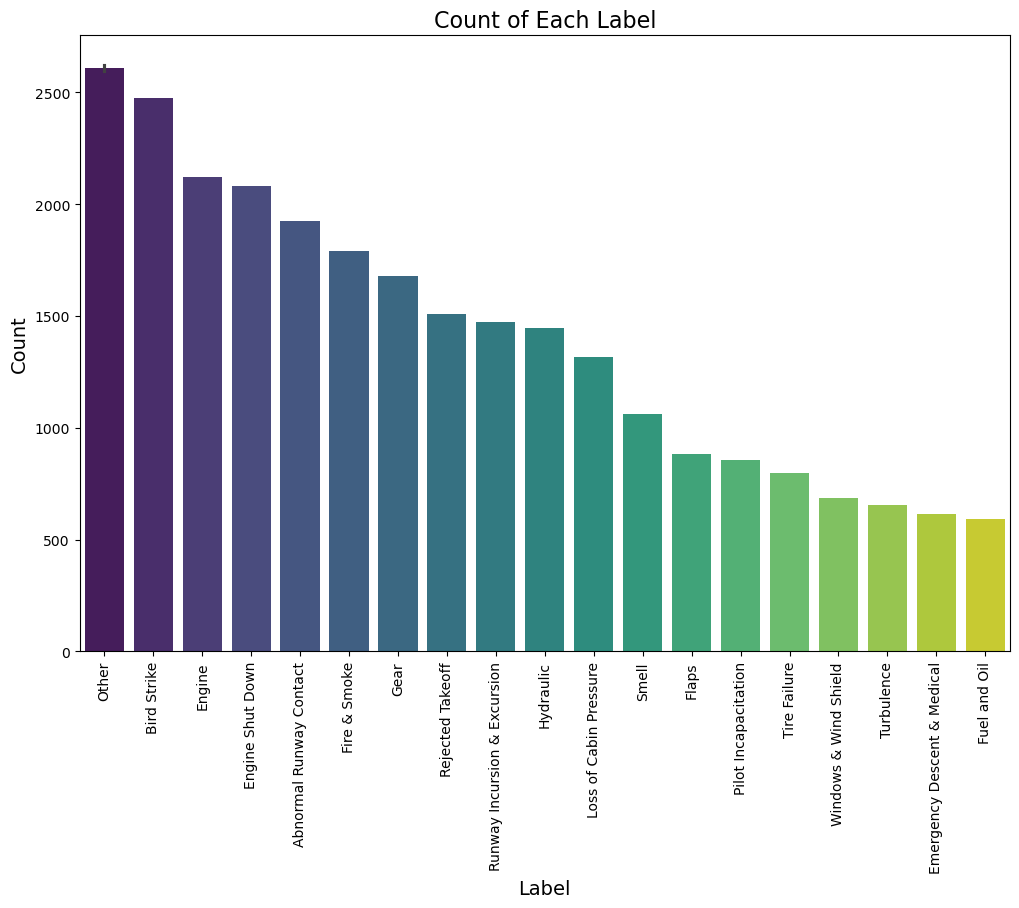

In [110]:
df_topic_sorted = df_topic.sort_values(by="label_count", ascending=False)

# Plotting using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='topic_label', y='label_count', data=df_topic_sorted, palette='viridis')

# Customize labels and title
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Each Label', fontsize=16)
plt.xticks(rotation=90)
plt.show()

## Use of Transformer Pipeline

In [1]:
from transformers import pipeline

In [2]:
nlp_qa = pipeline('question-answering')

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [19]:
corpus = df.text.tolist()[:200]

In [20]:
# Define the question
question = "where did edelweiss air have a fuel problem ?"

# Function to apply the QA pipeline to each document
def answer_question(question, corpus):
    answers = []
    for i, context in tqdm(enumerate(corpus)):
        result = nlp_qa(question=question, context=context)
        answers.append({"document": i, "answer": result['answer'], "score": result['score']})
    return answers

# Get answers from the corpus
answers = answer_question(question, corpus)

# Print the answers
for answer in answers:
  if answer["score"] > 0.8:
    print(f"Document {answer['document']} - Answer: {answer['answer']} (Score: {answer['score']})")

200it [01:27,  2.29it/s]

Document 47 - Answer: Los Angeles (Score: 0.9221720099449158)
Document 54 - Answer: Casablanca (Score: 0.9528437256813049)
Document 128 - Answer: Juba (Score: 0.919273853302002)


In [27]:
markdown_content = corpus[30]
display(Markdown(markdown_content)) 

A Porter Airlines de Havilland Dash 8-400, registration C-GLQP performing flight PD-2375 from Ottawa,ON to Fredericton,NB (Canada), was landing on Fredricton's runway 27 at 14:00L (17:00Z) when the aircraft's tail struck the runway. The crew initiated a go around, climbed to 2000 feet and positioned for another approach to runway 27. The aircraft landed without further incident about 8 minutes after the go around.The aircraft was unable to continue its schedule and is still on the ground in Fredericton (standing Jul 10th 2024).The Canadian TSB reported: "During approach to landing phase, the aircraft experienced  a tail strike which resulted in the flight crew conducted a  go around. Returning to the airport, the flight completed a visual circuit and landed without further incident. The touch runway sensor was illuminated, and the flight crew contacted company operations to advise of the occurrence. Ground crew personal discovered that the underside of the fuselage near the rear cargo door was substantially damaged and reported it immediately. The TSB deployed two investigators to gather information and examine the aircraft."Metars:CYFC 281900Z AUTO 33012G18KT 280V350 9SM BKN066 BKN080 22/09 A2998 RMK SLP155 DENSITY ALT 800FT=CYFC 281815Z AUTO 35012G17KT 9SM SCT071 22/08 A2998 RMK WSHFT AT 1800Z SLP153 DENSITY ALT 800FT=CYFC 281800Z AUTO 30009G16KT 9SM FEW066 21/08 A2998 RMK SLP153 DENSITY ALT 800FT=CYFC 281700Z AUTO 32014KT 9SM BKN071 BKN080 21/10 A2997 RMK SLP152 DENSITY ALT 800FT=CYFC 281600Z AUTO 33015G20KT 9SM SCT066 SCT075 21/07 A2996 RMK SLP147 DENSITY ALT 700FT=CYFC 281529Z AUTO 32017G25KT 290V360 9SM SCT055 SCT072 20/08 A2995 RMK SLP144 DENSITY ALT 700FT=CYFC 281500Z AUTO 30006G17KT 9SM BKN060 18/09 A2994 RMK SLP140 DENSITY ALT 500FT=CYFC 281400Z AUTO 32009G16KT 290V350 9SM FEW043 18/09 A2992 RMK SLP134 DENSITY ALT 500FT=CYFC 281300Z AUTO 33013KT 9SM CLR 17/10 A2989 RMK SLP125 DENSITY ALT 400FT=The tail of the aircraft after landing:

## Text similarity using SentenceTransformer

In [43]:
from sentence_transformers import SentenceTransformer, util

# Load a pre-trained model from sentence-transformers
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define your texts
texts = corpus

# Define a new text
new_text = "A Lufthansa A320-200, registration D-AIQP performing flight LH-44 from Munich to Hamburg Fuhlsbuettel (Germany) with 132 passengers and 5 crew, was on ILS approach to Hamburg Fuhlbuettel's runway 23 in strong gusting winds following storm system 'Emma' which had battered large parts of Europe with gale force winds. At 13:33L (12:33Z) the airplane flared, the left main gear touched the runway but lifted off again, the right hand wing rose rapidly causing the left wing tip to strike the runway surface and the aircraft veer to the left before the airplane was recovered by the crew and a go around commenced. The airplane landed safely on runway 33 19 minutes later. A video of the approach, touch down, recovery and go-around is available below."

# Generate embeddings for the texts
text_embeddings = model.encode(texts)
new_text_embedding = model.encode([new_text])

# Compute cosine similarity between the new text and the corpus
cosine_scores = util.pytorch_cos_sim(new_text_embedding, text_embeddings)[0].numpy()

# Get the indices of the sorted scores in descending order
sorted_indices = np.argsort(cosine_scores)[::-1]

# Print the sorted similarity scores and corresponding texts
print("Texts sorted by similarity to the new text:")
for idx in sorted_indices[:10]:
    print(f"Text: {texts[idx]}")
    print(f"Similarity Score: {cosine_scores[idx]:.4f}")
    print()


Texts sorted by similarity to the new text:
Text: A Lufthansa Airbus A321-200, registration D-AISR performing flight LH-816 from Frankfurt/Main (Germany) to Gothenburg (Sweden), was on approach to Gothenburg when the crew requested to enter a hold due to "build ups" on the final approach course to Gothenburg's runway 21, approach confirmed they saw build ups on the approach as well and saw lightning, but also advised that a short right hand circuit and short final to runway 21 appeared to be available. After two circuits and assessing their own weather radar as well as discussing with tower about tower's weather radar the crew opted to try the right hand pattern but received a lightning strike on downwind. The aircraft continued for a safe landing on runway 21.The aircraft was unable to depart for the return flight - the flight was cancelled - and is still on the ground in Gothenburg about 29 hours after landing.Metars:ESGG 091420Z 22018KT 9999 SHGSRA SCT018CB BKN037 09/06 Q0996=ESGG 0

<div style="border-top:0.1cm solid #EF475B"></div>
    <strong><a href='#Q0'><div style="text-align: right"> <h3>End of this Notebook.</h3></div></a></strong>